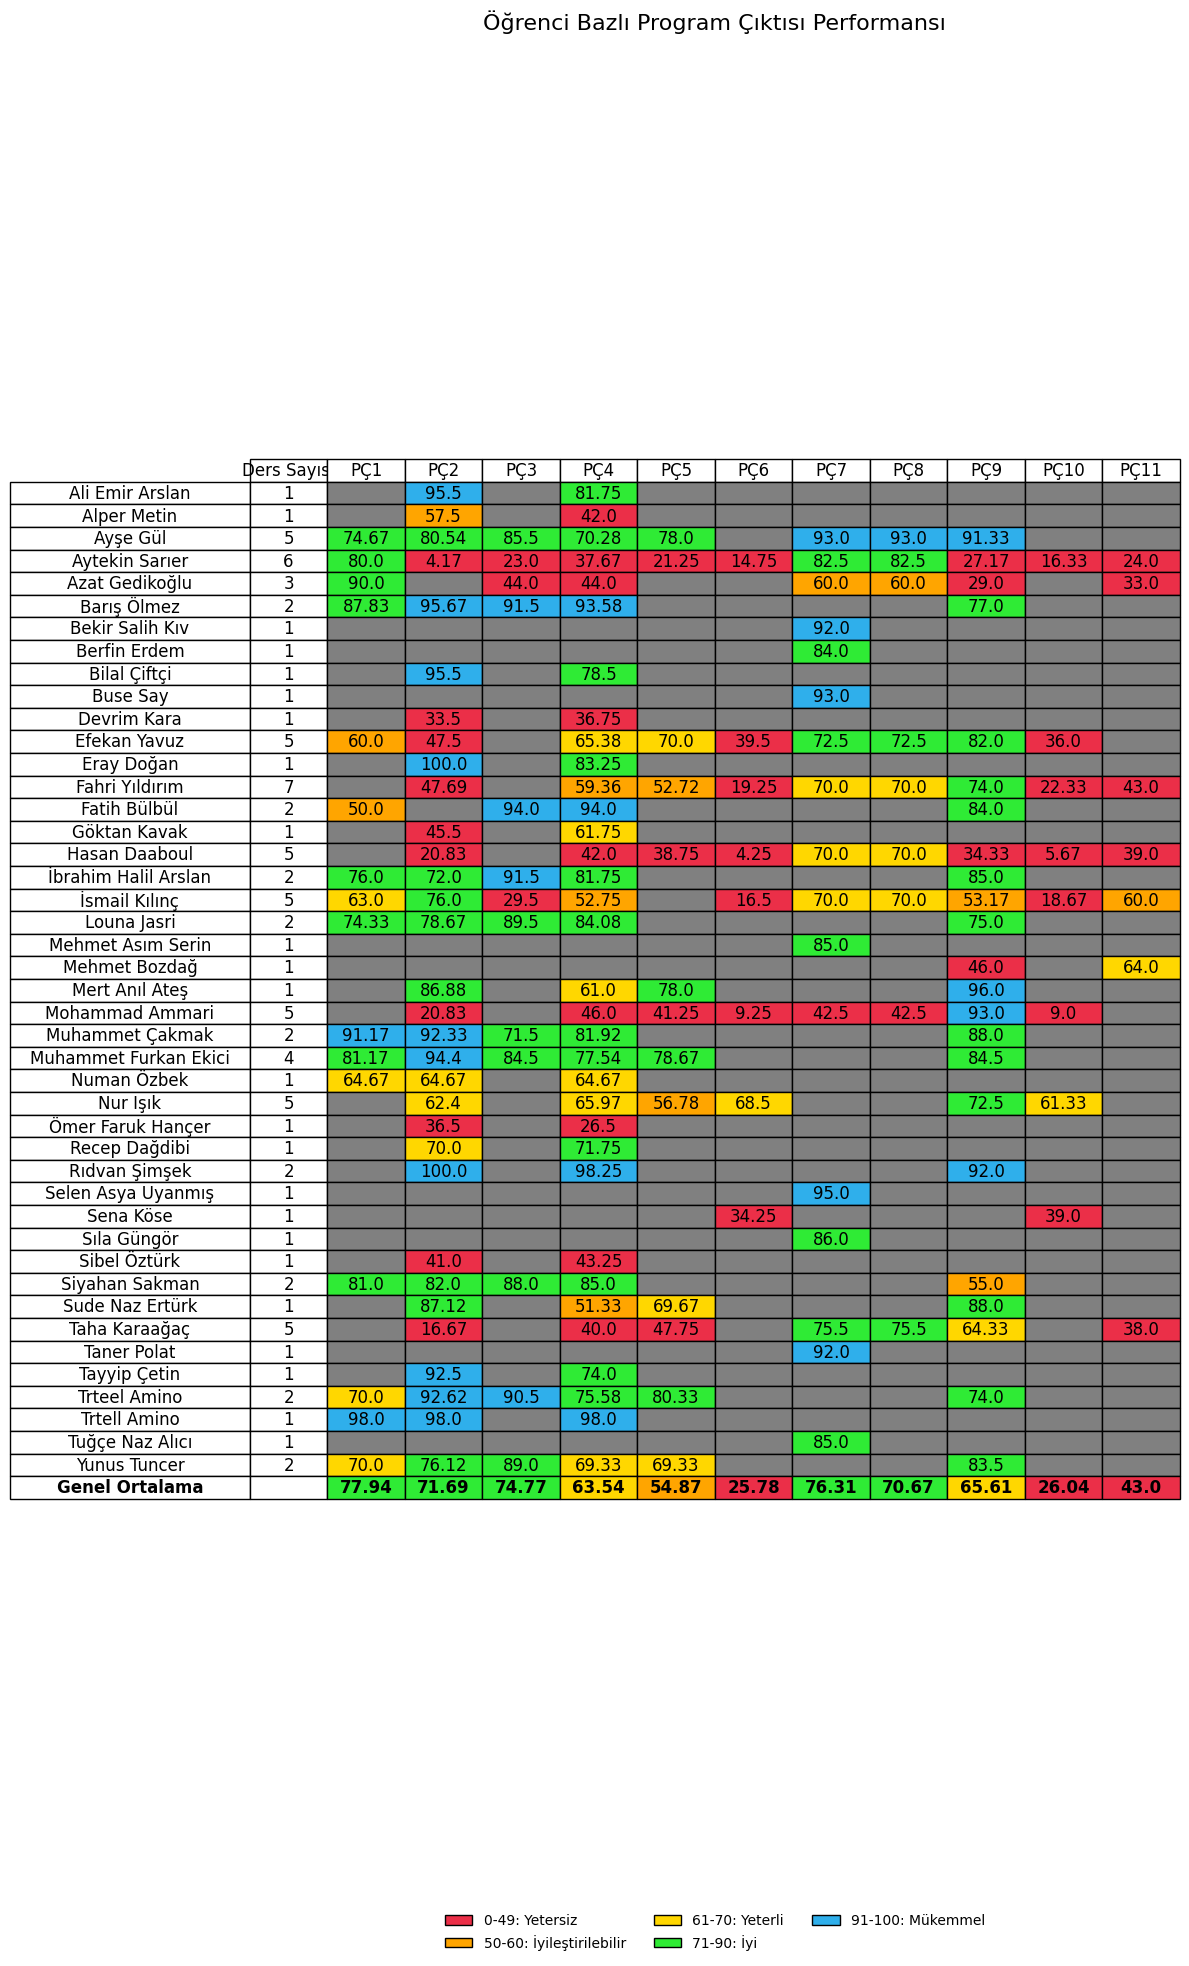

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from collections import defaultdict

# -------------------------
# 1. DERS VERİLERİNİ TANIMLA
# -------------------------
# Her dersin AKTS değeri, öğrencileri, ÖÇ notları ve OÇ-PÇ eşleşmeleri tanımlanır.
# Notlar öğrencilerle aynı sıradadır.

ders_dict = {
    'Kırsal Arazi Düzenlemesi': {
        'AKTS': 4,
        'students': ["Muhammet Furkan Ekici", "Azat Gedikoğlu", "Barış Ölmez", "Louna Jasri", "Trteel Amino", "İbrahim Halil Arslan", "İsmail Kılınç", "Siyahan Sakman", "Ayşe Gül", "Aytekin Sarıer", "Yunus Tuncer", "Muhammet Çakmak", "Fatih Bülbül"],
        'grades': {
            'OÇ1': [70, 90, 80, 70, 70, 80, 50, 80, 80, 80, 70, 90, 50],
            'OÇ2': [70, 35, 77, 75, 48, 85, 45, 55, 90, 35, 78, 88, 80],
            'OÇ3': [79, 73, 88, 79, 81, 88, 44, 81, 81, 31, 88, 48, 88],
            'OÇ4': [90,15,95,100,100,95,15,95,90,15,90,95,100]
        },
        'pç_weights': {
            'PÇ1': {'OÇ1': 0.25},
            'PÇ9': {'OÇ2': 0.25},
            'PÇ3': {'OÇ3': 0.25, 'OÇ4': 0.25},
            'PÇ4': {'OÇ3': 0.25, 'OÇ4': 0.25}
        }
    },
    'CBS Uygulamaları': {
        'AKTS': 5,
        'students': ["Mohammad Ammari", "Hasan Daaboul", "Aytekin Sarıer", "Taha Karaağaç", "Fahri Yıldırım", "Nur Işık"],
        'grades': {
            'OÇ1' : [62, 66, 38, 74, 78, 86],
            'OÇ2' : [69, 57, 73, 47, 79, 93],
            'OÇ3' : [50, 67, 67, 83, 100, 67],
            'OÇ4' : [53, 39, 47, 67, 61, 69]
        },
        'pç_weights' : {
          'PÇ5': {'OÇ1': 0.50, 'OÇ4': 0.50},
          'PÇ4': {'OÇ2': 0.50, 'OÇ3': 0.50}
        }
    },
    'Uzaktan Algılama Uygulamaları' : {
        'AKTS': 4,
        'students': ["Mohammad Ammari", "Hasan Daaboul", "Efekan Yavuz", "Aytekin Sarıer", "Taha Karaağaç", "Fahri Yıldırım", "Nur Işık"],
        'grades': {
            'OÇ1': [12.5, 17.5, 75, 18.75, 31.25, 18.75, 75],
            'OÇ2': [25, 25, 70, 0, 25, 25, 37.5],
            'OÇ3': [16.6666667, 16.6666667, 0, 8.3333333, 8.3333333, 0, 53.3333333],
            'OÇ4': [50, 25, 67.5, 25, 0, 62.5, 85]
        },
        'pç_weights': {
            'PÇ2': {'OÇ2': 0.5, 'OÇ3': 0.5},
            'PÇ4': {'OÇ1': 0.4, 'OÇ2': 0.1, 'OÇ4': 0.5},
            'PÇ5': {'OÇ2': 1.0}
        }
    },
    'Yol Bilgisi ve Projesi' : {
        'AKTS': 5,
        'students': ["Muhammet Furkan Ekici", "Sude Naz Ertürk", "Mert Anıl Ateş", "Trteel Amino", "Ayşe Gül", "Yunus Tuncer", "Fahri Yıldırım", "Nur Işık"],
        'grades': {
            'OÇ1': [99, 88, 96, 100, 100, 89, 80, 69],
            'OÇ2': [98, 100, 91, 100, 100, 78, 98, 100],
            'OÇ3': [38, 33, 44, 41, 34, 30, 31, 28],
            'OÇ4': [99, 88, 95, 100, 100, 89, 80, 69]
        },
        'pç_weights': {
            'PÇ2': {'OÇ1': 0.50, 'OÇ2': 1, 'OÇ3': 0.25, 'OÇ4': 0.25},
            'PÇ4': {'OÇ3': 0.50, 'OÇ4': 0.25},
            'PÇ5': {'OÇ3': 0.25, 'OÇ4': 0.50},
            'PÇ9': {'OÇ1': 0.50}
        }
    },
        'Mühendislik Etiği Semineri' : {
        'AKTS': 2,
        'students': ["Taha Karaağaç","Mohammad Ammari","Nur Işık","Efekan Yavuz","Fatih Bülbül", "Rıdvan Şimşek", "Ayşe Gül", "Fahri Yıldırım"],
        'grades': {
            'OÇ1': [86, 93, 76, 82, 88, 92, 84, 97]
        },
        'pç_weights': {
            'PÇ9': {'OÇ1': 1}
        }
  },
    'Türk Dili 1' : {
        'AKTS': 2,
        'students': ["Buse Say", "Taner Polat", "Selen Asya Uyanmış", "Tuğçe Naz Alıcı", "Bekir Salih Kıv", "Berfin Erdem", "Sıla Güngör", "Mehmet Asım Serin" ],
        'grades': {
            'OÇ1': [93, 92, 95, 85, 92, 84, 86,  85]
        },
        'pç_weights': {
            'PÇ7': {'OÇ1': 1}
        }
    },
    'Mesleki İngilizce' : {
        'AKTS': 2,
        'students': ["Azat Gedikoğlu", "Mohammad Ammari","Hasan Daaboul","Efekan Yavuz", "İsmail Kılınç", "Ayşe Gül","Aytekin Sarıer","Taha Karaağaç","Fahri Yıldırım" ],
        'grades': {
            'OÇ1': [60,55,60,85,90,95,85, 85, 80 ],
            'OÇ2': [60,30,80, 60, 50, 91, 80,66,60]
        },
        'pç_weights': {
            'PÇ7': {'OÇ1': 1, 'OÇ2': 1},
            'PÇ8': {'OÇ1': 1, 'OÇ2': 1}
        }
    },
      'Programlama' : {
        'AKTS': 5,
        'students': ["Muhammet Furkan Ekici", "Devrim Kara", "Recep Dağdibi", "Göktan Kavak", "Sibel Öztürk", "Ali Emir Arslan", "Ömer Faruk Hançer", "Bilal Çiftçi", "Tayyip Çetin", "Eray Doğan", "Alper Metin", "Rıdvan Şimşek"],
        'grades': {
            'OÇ1': [100, 67, 100,91, 82, 91, 73, 91, 85, 100, 55, 100],
            'OÇ2': [67, 0, 67, 100, 44, 56, 33, 56, 44, 100, 33, 100],
            'OÇ3': [33, 80, 80, 56, 47, 80,0, 67, 67, 33, 20, 93],
            'OÇ4': [100, 0, 40, 0, 0, 100,0, 100, 100, 100, 60, 100]
        },
        'pç_weights': {
            'PÇ2': {'OÇ1': 0.50, 'OÇ4': 0.50},
            'PÇ4': {'OÇ1': 0.25, 'OÇ2': 0.25, 'OÇ3': 0.25, 'OÇ4': 0.25}
        }
    },
      'Kadastro Bilgisi' : {
        'AKTS': 3,
        'students': ["Mehmet Bozdağ", "Azat Gedikoğlu", "Hasan Daaboul", "İsmail Kılınç", "Aytekin Sarıer", "Taha Karaağaç","Fahri Yıldırım"],
        'grades': {
            'OÇ1': [46, 18, 32, 96, 16, 52, 60 ],
            'OÇ2': [28, 18, 42, 28, 18, 38, 32],
            'OÇ3': [64,33,29, 60, 24, 38, 43],
            'OÇ4': [64, 33, 39, 60, 24, 38, 43]
        },
        'pç_weights': {
            'PÇ9': {'OÇ1': 0.50, 'OÇ2': 0.50, 'OÇ3': 0.50},
            'PÇ11': {'OÇ4': 1}
        }
    },
      'Veri Bilimi' : {
        'AKTS': 3,
        'students': ["Ayşe Gül","Muhammet Furkan Ekici","Numan Özbek","İbrahim Halil Arslan","Efekan Yavuz","Muhammet Çakmak","İsmail Kılınç","Louna Jasri","Trtell Amino","Siyahan Sakman","Barış Ölmez"],
        'grades': {
        'OÇ1': [78, 81, 83, 81, 78, 81, 78, 50, 98, 98, 98],
        'OÇ2': [68, 98, 44, 62, 57, 98, 80, 94, 98, 75, 96],
        'OÇ3': [62, 98, 67, 73, 45, 98, 70, 92, 98, 73, 93],
        'OÇ4': [78, 81, 83, 81, 78, 81, 78, 50, 98, 98, 98]
    },
        'pç_weights': {
            'PÇ1': {'OÇ1': 0.25, 'OÇ2': 0.25, 'OÇ3': 0.25, 'OÇ3': 0.25},
            'PÇ2': {'OÇ1': 0.25, 'OÇ2': 0.25, 'OÇ3': 0.25, 'OÇ3': 0.25},
            'PÇ4': {'OÇ1': 0.25, 'OÇ2': 0.25, 'OÇ3': 0.25, 'OÇ3': 0.25},
        }
    },
          'İmar Bilgisi' : {
        'AKTS': 4,
        'students': ["Sena Köse","Mohammad Ammari", "Hasan Daaboul", "Efekan Yavuz", "İsmail Kılınç","Aytekin Sarıer", "Fahri Yıldırım", "Nur Işık"],
        'grades': {
        'OÇ1': [20, 10, 0, 50, 10, 10, 10, 90],
        'OÇ2': [17, 17, 17, 18, 26, 19, 17, 14],
        'OÇ3': [80, 0, 0, 40, 20, 20, 40, 80],
        'OÇ4': [41, 52, 51, 54, 80, 57, 52, 41]
    },
        'pç_weights': {
            'PÇ6': {'OÇ1': 0.50, 'OÇ2': 0.25, 'OÇ3': 0.25},
            'PÇ10': {'OÇ1': 0.25, 'OÇ2': 0.25, 'OÇ3': 0.25, 'OÇ3': 0.25},
        }
    }
}

# -------------------------
# 2. BİREYSEL PÇ NOTLARINI HESAPLA
# -------------------------
# Her öğrenci için, katıldığı derslerdeki ÖÇ notları ve ağırlıkları kullanılarak PÇ notları hesaplanır.
# Bu notlar, dersin AKTS ve katkı ağırlığı ile birlikte genel ortalama için de biriktirilir.

all_students = set()
student_pç_notes = defaultdict(lambda: defaultdict(list))
program_outcome_aggregates = defaultdict(list)
student_course_count = defaultdict(set)

for ders_adi, ders in ders_dict.items():
    students = ders['students']
    grades = ders['grades']
    pç_weights = ders['pç_weights']
    akts = ders['AKTS']

    for pç, oc_weights in pç_weights.items():
        for i, student in enumerate(students):
            total_score = 0
            total_weight = 0
            for oc, weight in oc_weights.items():
                note = grades[oc][i]
                total_score += note * weight
                total_weight += weight
            if total_weight > 0:
                weighted_score = total_score / total_weight
                student_pç_notes[student][pç].append(weighted_score)
                program_outcome_aggregates[pç].append((weighted_score, akts, sum(oc_weights.values())))
                student_course_count[student].add(ders_adi)
                all_students.add(student)

# -------------------------
# 3. TABLO OLUŞTUR
# -------------------------
# Her öğrencinin ortalama PÇ notları tabloya yerleştirilir.

turkish_alphabet = "AaBbCcÇçDdEeFfGgĞğHhIıİiJjKkLlMmNnOoÖöPpRrSsŞşTtUuÜüVvYyZz"

alphabet_order = {char: index for index, char in enumerate(turkish_alphabet)}

def turkish_sort_key(name):
    return [alphabet_order.get(c, ord(c)) for c in name]

sorted_students = sorted(all_students, key=turkish_sort_key)
import re

def sort_key(pç):
    match = re.search(r'\d+', pç)
    return int(match.group()) if match else float('inf')

sorted_pç = sorted(
    set(p for student in student_pç_notes for p in student_pç_notes[student]),
    key=sort_key
)

# DataFrame oluştur
student_df = pd.DataFrame(index=sorted_students, columns=sorted_pç)

for student in sorted_students:
    for pç in sorted_pç:
        notlar = student_pç_notes[student].get(pç)
        if notlar:
            student_df.loc[student, pç] = round(np.mean(notlar), 2)

# Ders sayısı sütunu eklenir
ders_sayilari = [len(student_course_count[student]) for student in student_df.index]
student_df.insert(0, "Ders Sayısı", ders_sayilari)

# -------------------------
# 4. GENEL ORTALAMA EKLE
# -------------------------
# PÇ genel ortalamaları tüm öğrencilerden ve AKTS katkılarına göre hesaplanır.

pçgno = {}
for pç, values in program_outcome_aggregates.items():
    num = sum(score * akts * katkı for score, akts, katkı in values)
    denom = sum(akts * katkı for _, akts, katkı in values)
    pçgno[pç] = round(num / denom, 2) if denom > 0 else None

# Genel Ortalama satırı tabloya eklenir
genel_satir = {pç: pçgno.get(pç, '') for pç in sorted_pç}
genel_satir["Ders Sayısı"] = ''
student_df.loc["Genel Ortalama"] = genel_satir

# -------------------------
# 5. RENKLENDİRME
# -------------------------
# Notlara göre renk kodları atanır (kırmızı, turuncu, sarı, yeşil, mavi).

def score_to_color_code(score):
    try:
        score = float(score)
    except (ValueError, TypeError):
        return '#FFFFFF'
    if 0 <= score < 50:
        return '#eb2f48'
    elif 50 <= score <= 60:
        return '#FFA500'
    elif 60 < score <= 70:
        return '#FFD700'
    elif 70 < score <= 90:
        return '#2feb35'
    elif 90 < score <= 100:
        return '#2fafeb'
    else:
        return '#808080'

# Sadece PÇ sütunlarını renklendir
color_matrix = student_df.copy()
for col in student_df.columns:
    if col == "Ders Sayısı":
        color_matrix[col] = '#FFFFFF'
    else:
        color_matrix[col] = student_df[col].map(score_to_color_code)

# -------------------------
# 6. GÖRSELLEŞTİRME
# -------------------------
# Renkli tablo oluşturulur ve görsel kaydedilir.

fig, ax = plt.subplots(figsize=(12, len(student_df)*0.45 + 1.5))
ax.axis('off')

data_strings = student_df.fillna('').astype(str).values
color_values = color_matrix.values

table = ax.table(cellText=data_strings,
                 rowLabels=student_df.index,
                 colLabels=student_df.columns,
                 cellColours=color_values,
                 cellLoc='center',
                 rowLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.2)

# "Genel Ortalama" satırı kalınlaştırılır
for (row, col), cell in table.get_celld().items():
    if student_df.index.tolist() + ['Genel Ortalama'] and row == len(student_df.index):  # son satır
        cell.set_text_props(weight='bold')

# Açıklayıcı renk lejantı eklenir
legend_elements = [
    Patch(facecolor='#eb2f48', edgecolor='k', label='0-49: Yetersiz'),
    Patch(facecolor='#FFA500', edgecolor='k', label='50-60: İyileştirilebilir'),
    Patch(facecolor='#FFD700', edgecolor='k', label='61-70: Yeterli'),
    Patch(facecolor='#2feb35', edgecolor='k', label='71-90: İyi'),
    Patch(facecolor='#2fafeb', edgecolor='k', label='91-100: Mükemmel')
]

ax.legend(handles=legend_elements,
          loc='lower center',
          bbox_to_anchor=(0.5, -0.02),
          ncol=3, fontsize=10, frameon=False)

plt.title("Öğrenci Bazlı Program Çıktısı Performansı", fontsize=16, pad=2)
plt.subplots_adjust(top=0.92, bottom=0.05)

plt.savefig('program_ciktisi_performansi.png', dpi=300, bbox_inches='tight')
plt.show()



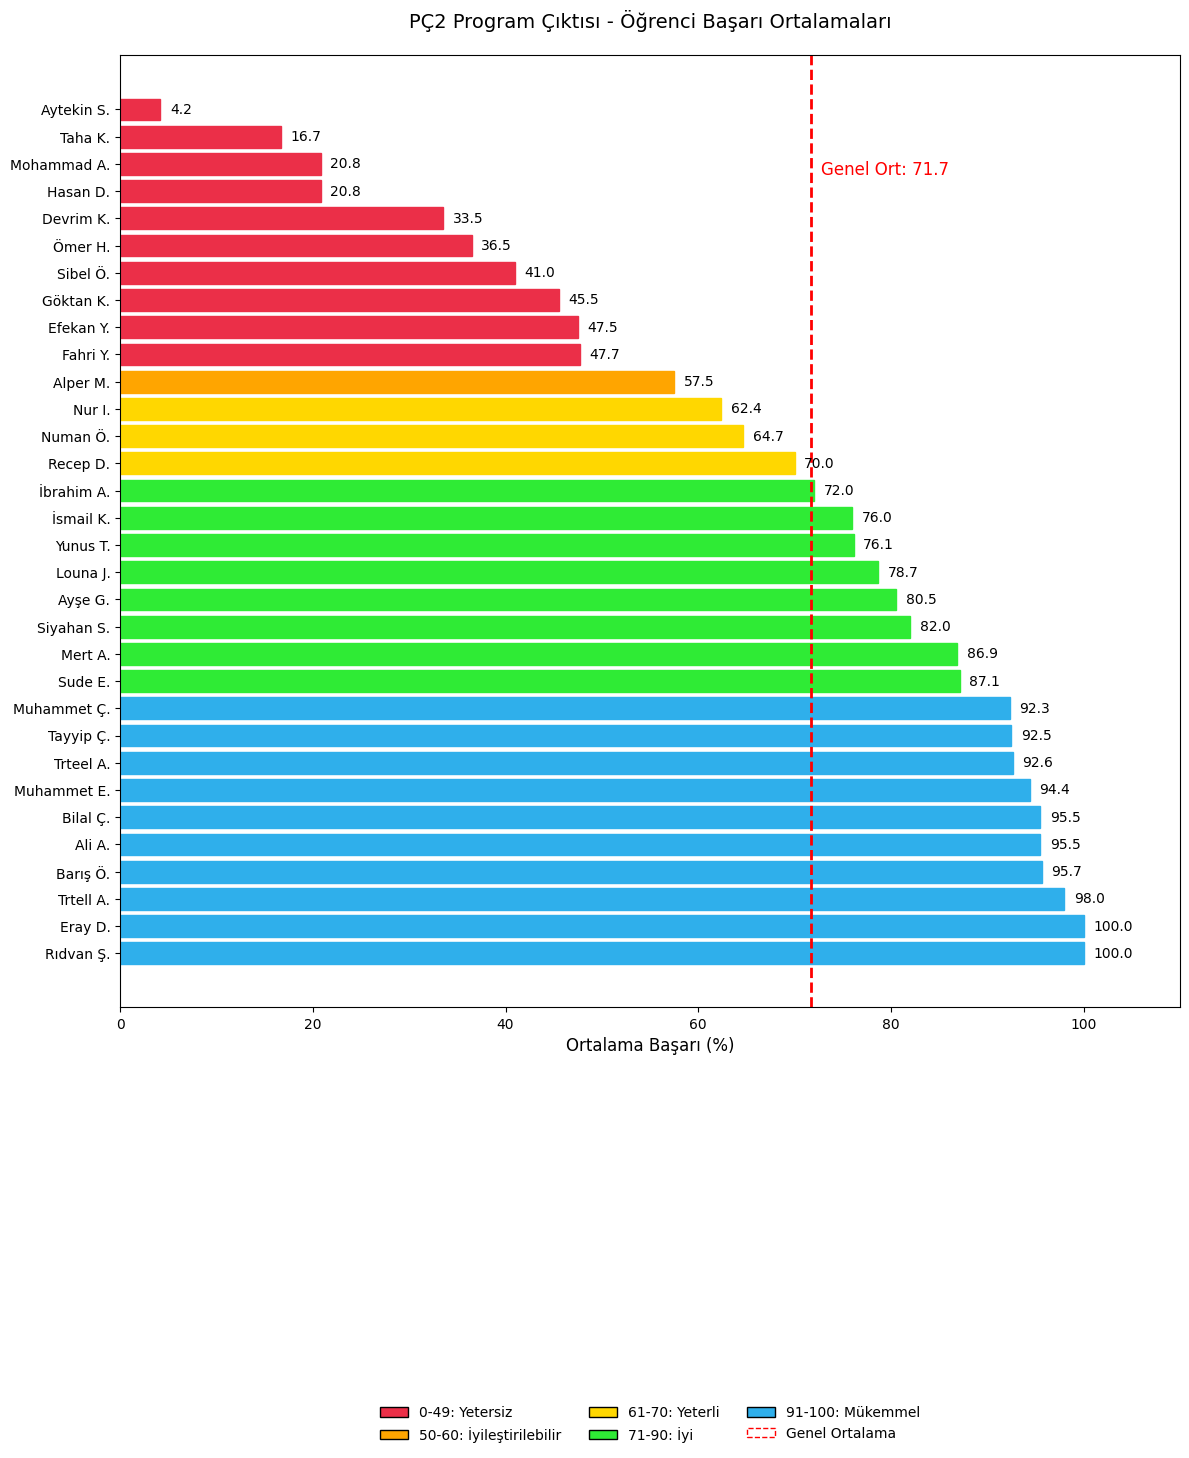

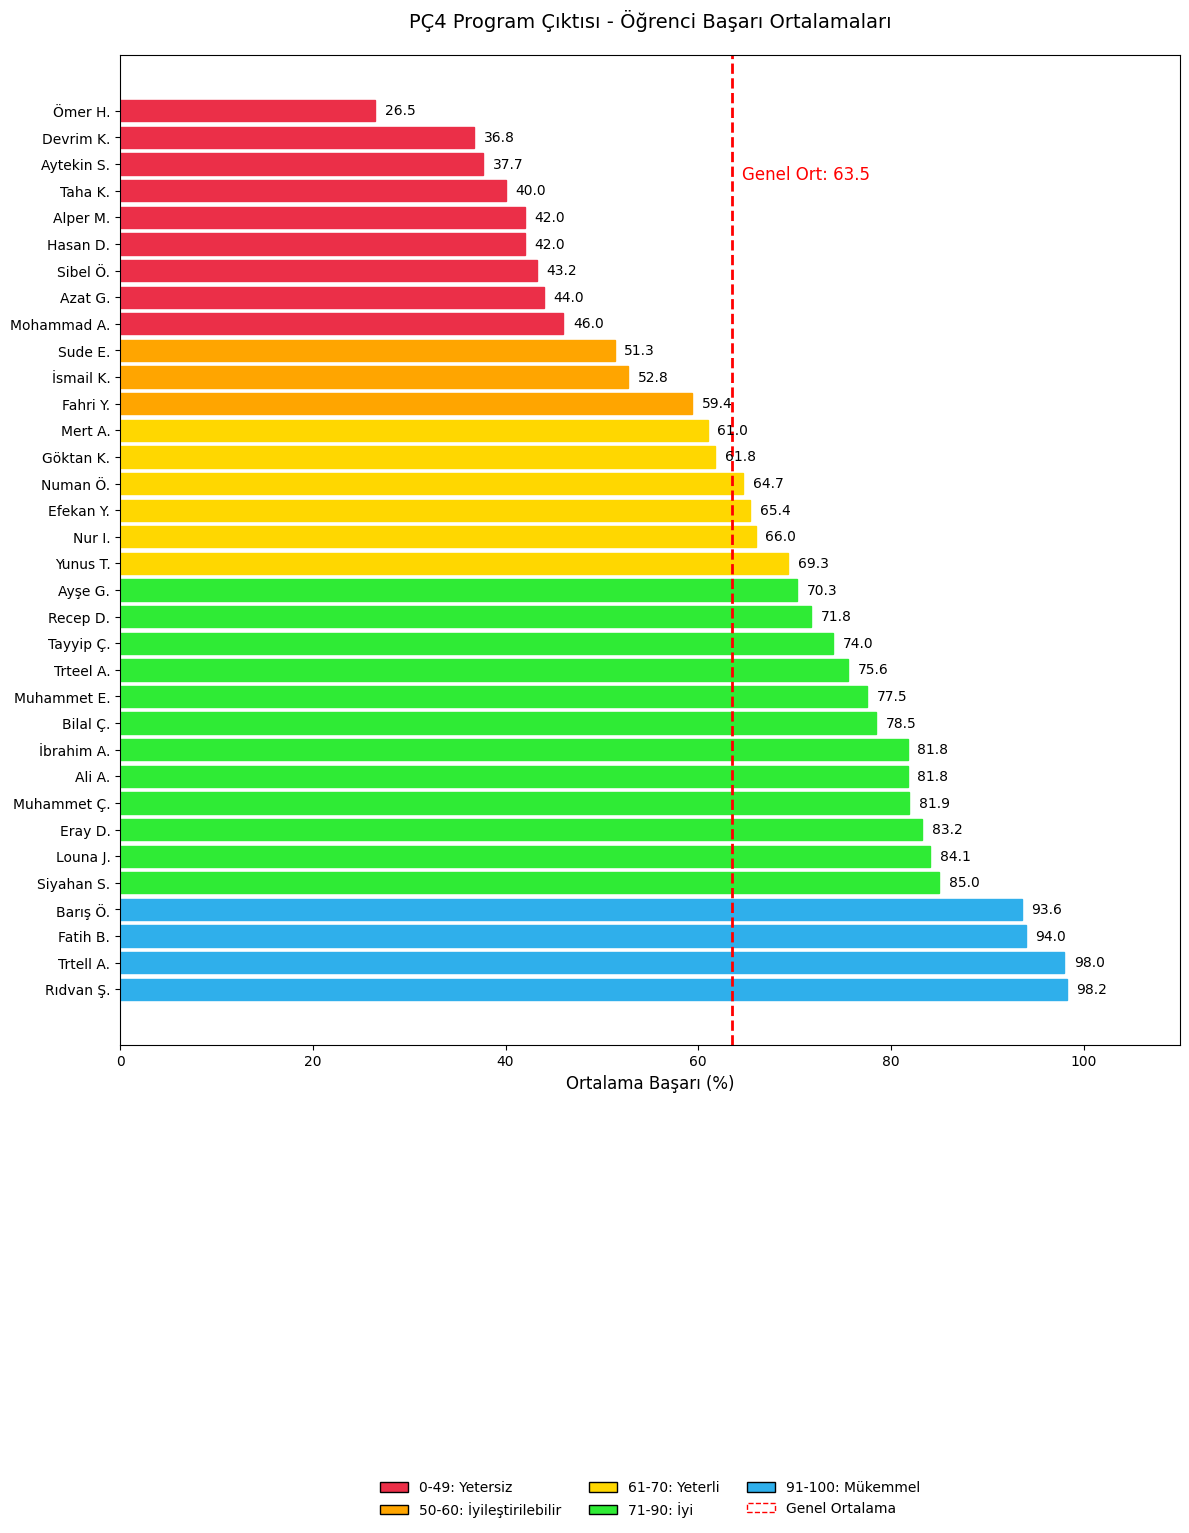

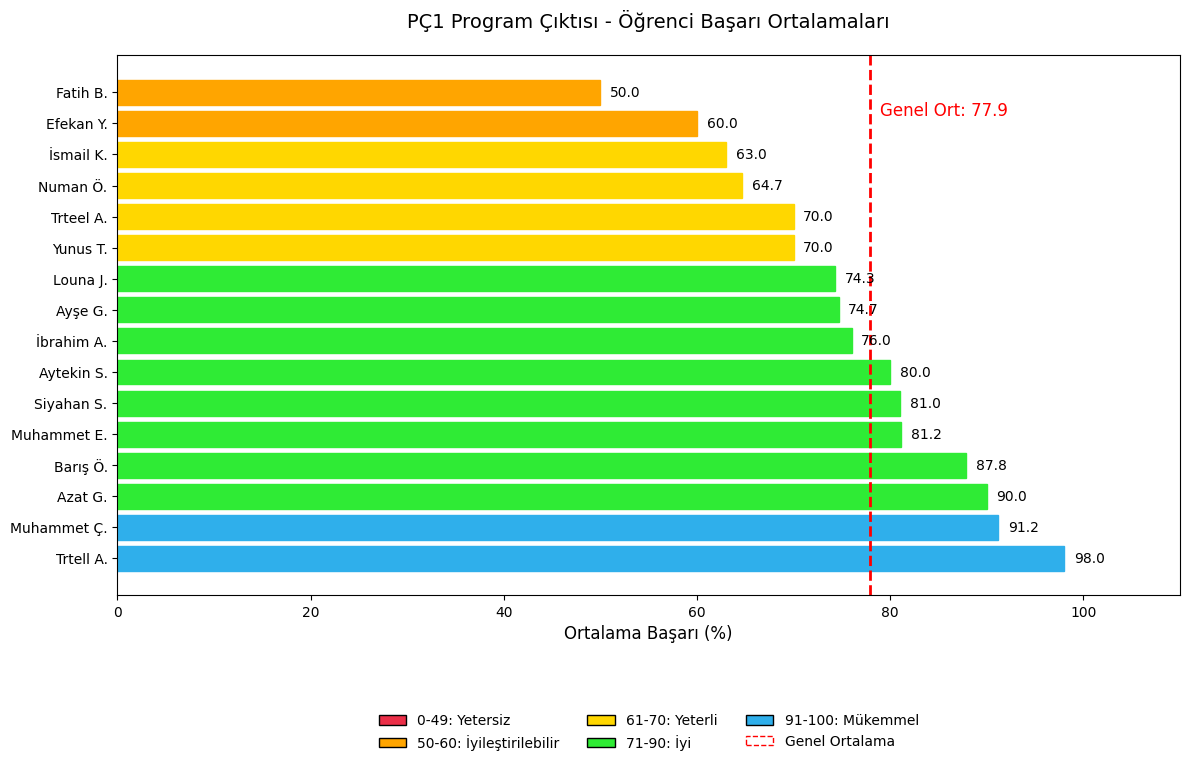

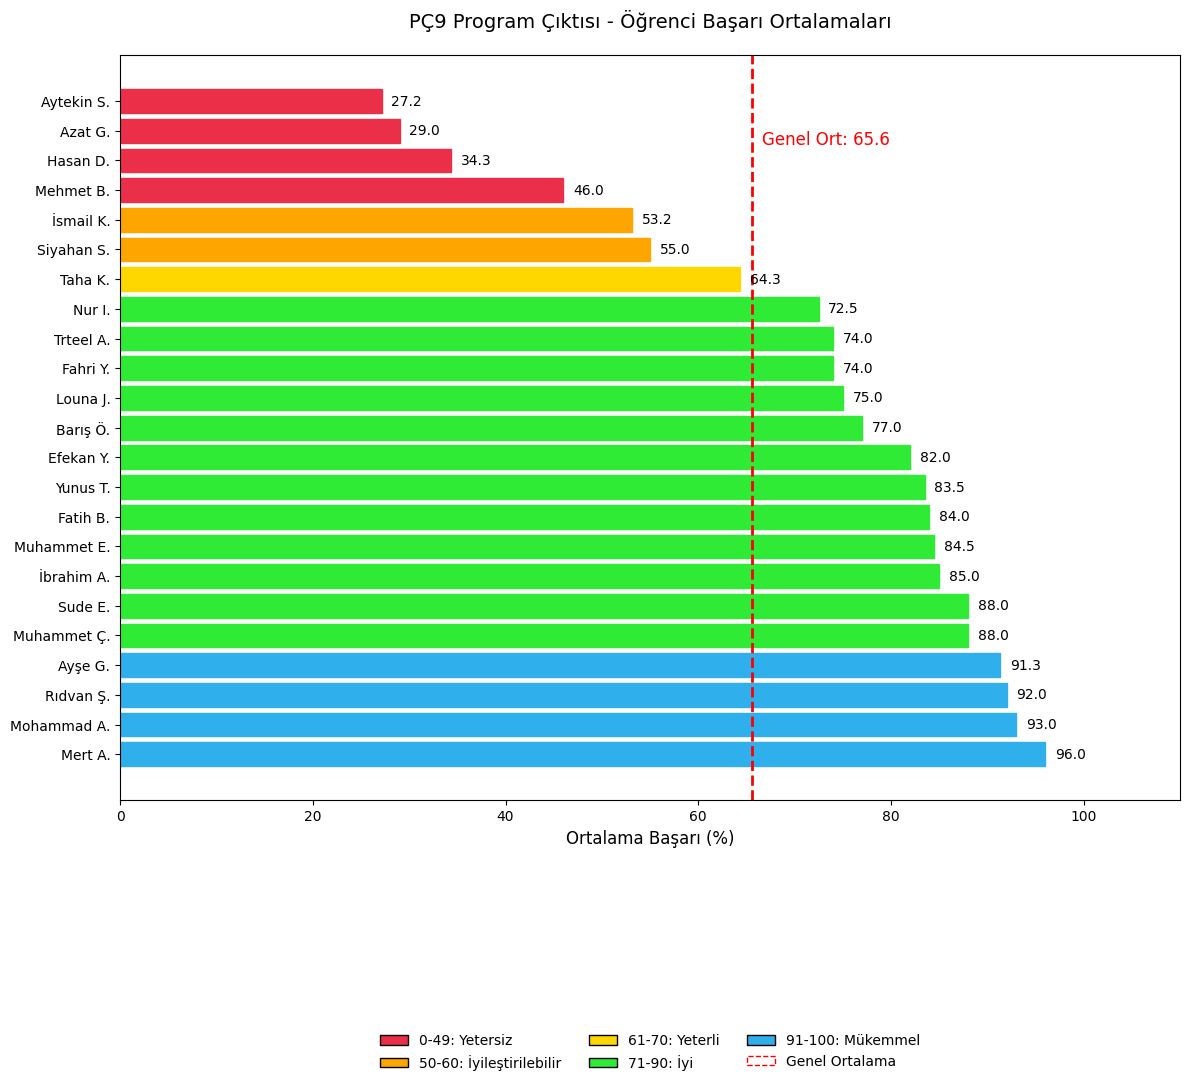

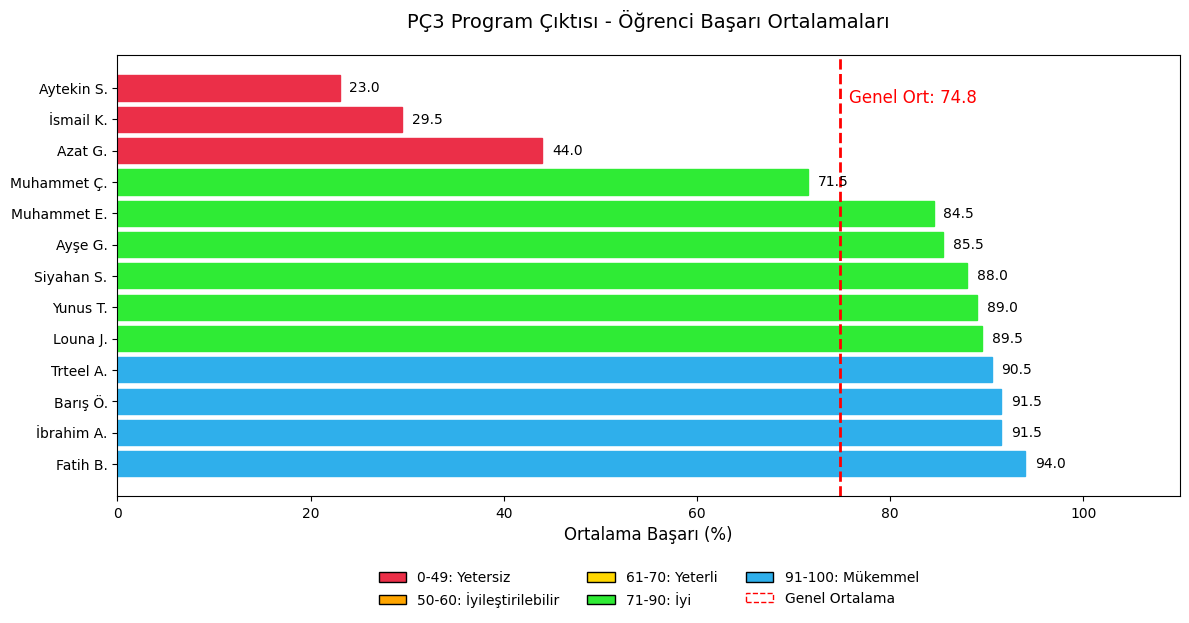

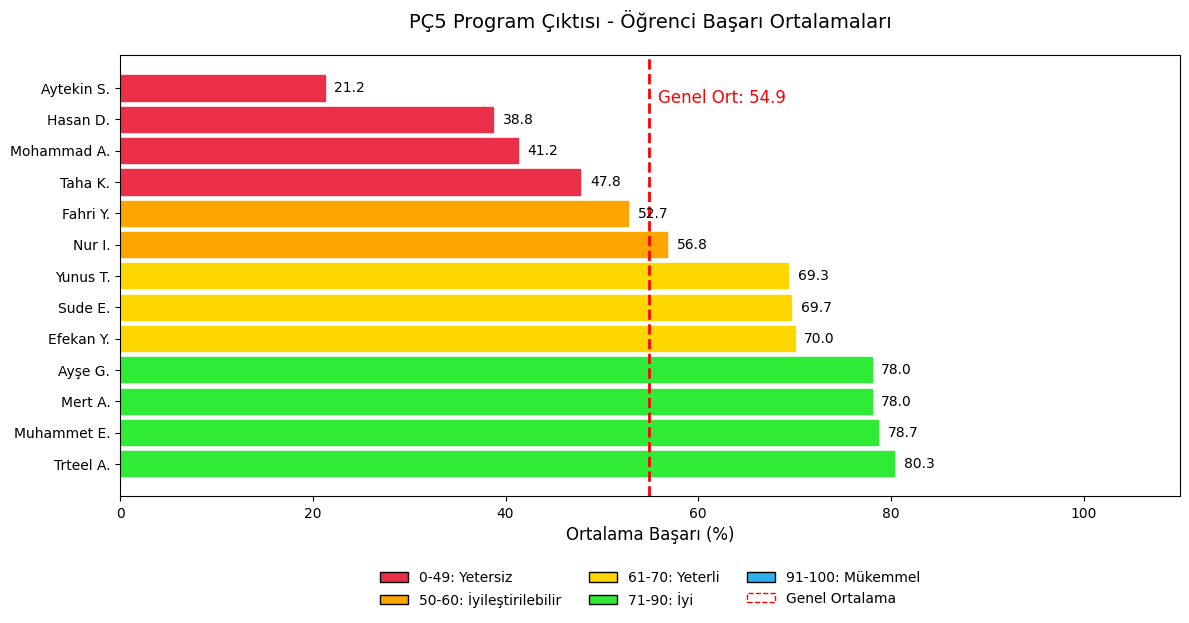

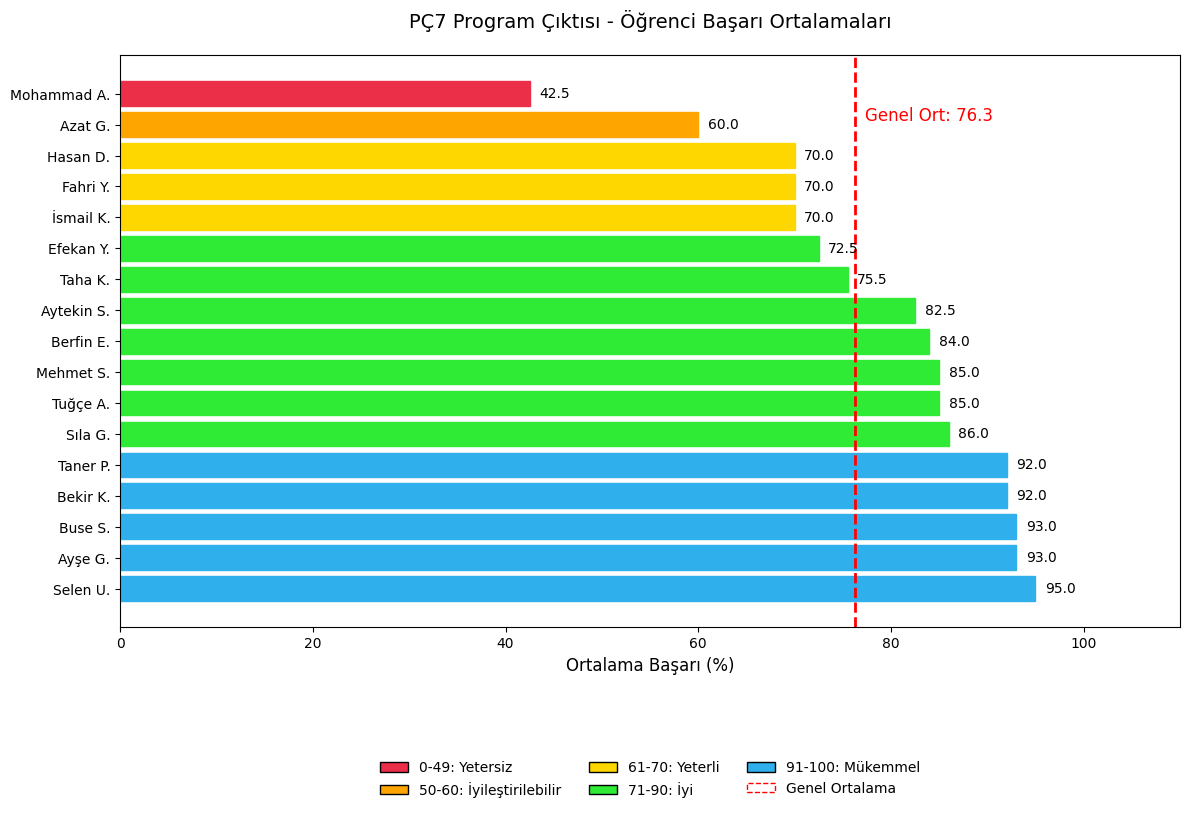

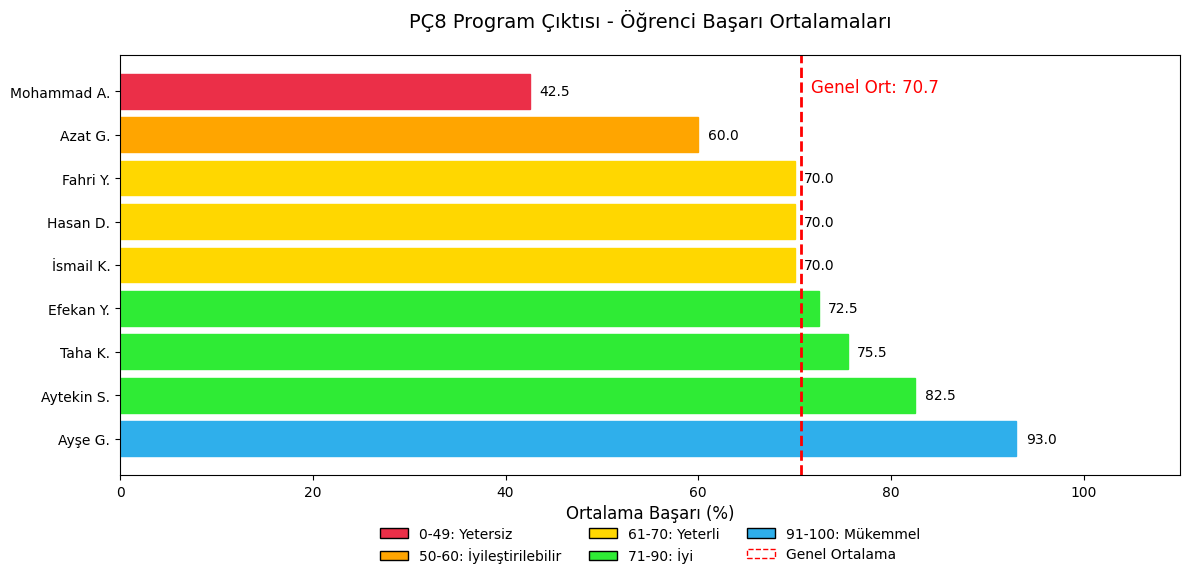

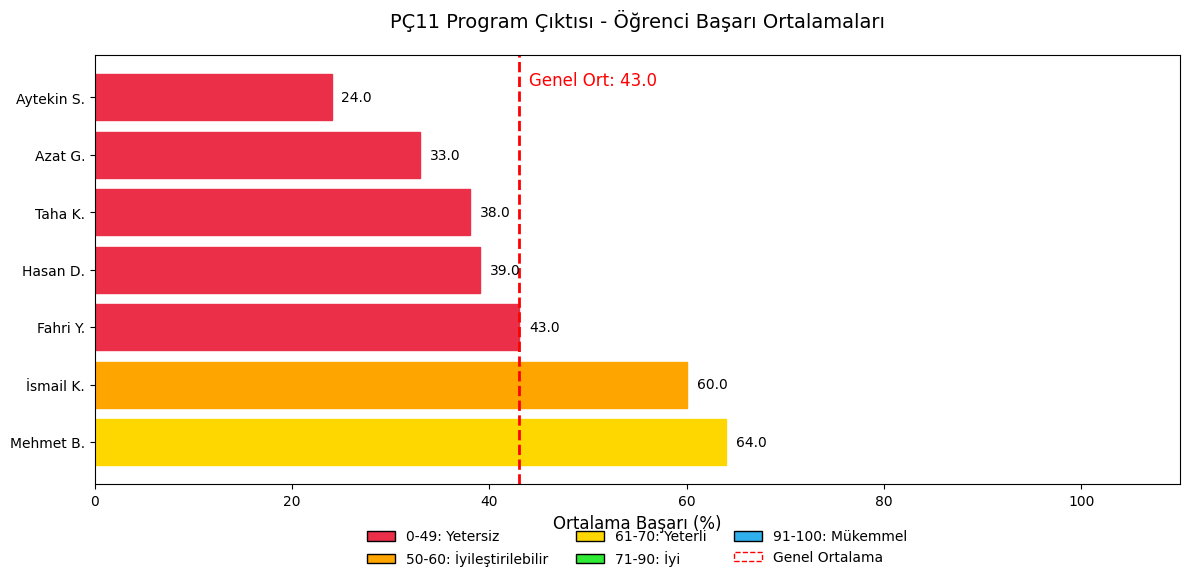

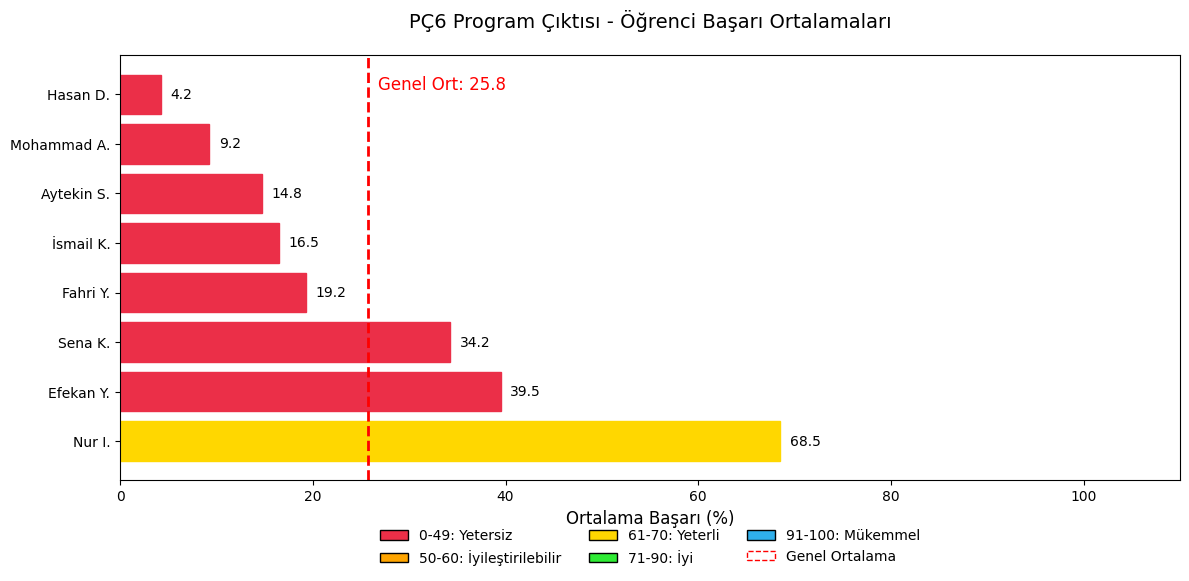

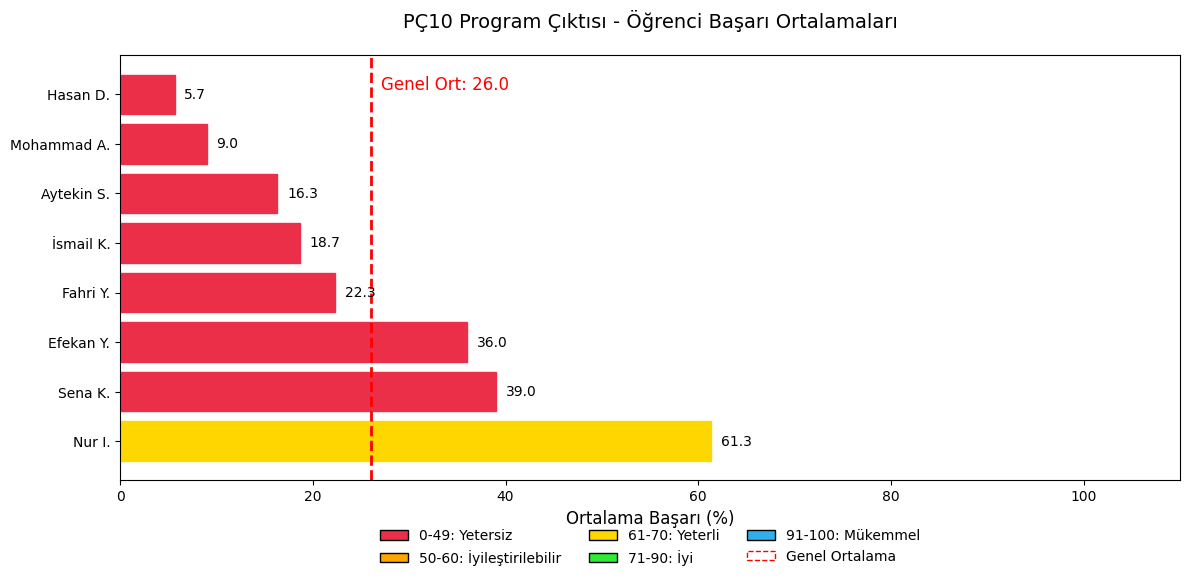

Tüm grafikler başarıyla oluşturuldu!


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# -------------------------
# HER PÇ İÇİN ÖĞRENCİ BAŞARI GRAFİKLERİ
# -------------------------

# Önce her PÇ için hangi öğrencilerin olduğunu ve ortalama notlarını toplayalım
pç_student_performance = defaultdict(list)

for student in sorted_students:
    if student not in student_pç_notes:
        continue

    student_pç = student_pç_notes[student]
    for pç, scores in student_pç.items():
        avg_score = np.mean(scores)
        pç_student_performance[pç].append((student, avg_score))

# Şimdi her PÇ için ayrı bir grafik oluşturalım
for pç, student_scores in pç_student_performance.items():
    # Verileri hazırla
    students = [item[0] for item in student_scores]
    scores = [item[1] for item in student_scores]

    # Öğrenci isimlerini kısalt
    short_names = []
    for name in students:
        parts = name.split()
        short_name = f"{parts[0]} {parts[-1][0]}." if len(parts) > 1 else parts[0]
        short_names.append(short_name)

    # Sıralama yap (en yüksek puandan en düşüğe)
    sorted_indices = np.argsort(scores)[::-1]
    sorted_scores = np.array(scores)[sorted_indices]
    sorted_names = np.array(short_names)[sorted_indices]

    plt.figure(figsize=(12, max(6, len(students)*0.5)))  # Öğrenci sayısına göre yükseklik ayarla
    bars = plt.barh(sorted_names, sorted_scores, color='#2fafeb')

    # Renkleri notlara göre ayarla
    for bar, score in zip(bars, sorted_scores):
        if 0 <= score < 50:
            bar.set_color('#eb2f48')
        elif 50 <= score <= 60:
            bar.set_color('#FFA500')
        elif 60 < score <= 70:
            bar.set_color('#FFD700')
        elif 70 < score <= 90:
            bar.set_color('#2feb35')
        elif 90 < score <= 100:
            bar.set_color('#2fafeb')

    plt.title(f'{pç} Program Çıktısı - Öğrenci Başarı Ortalamaları', fontsize=14, pad=20)
    plt.xlabel('Ortalama Başarı (%)', fontsize=12)
    plt.xlim(0, 110)

    # Genel ortalamayı dikey çizgi olarak ekle
    if pç in pçgno:
        plt.axvline(x=pçgno[pç], color='red', linestyle='--', linewidth=2)
        plt.text(pçgno[pç]+1, len(students)*0.9, f'Genel Ort: {pçgno[pç]:.1f}',
                color='red', va='center', fontsize=12)

    # Değerleri çubukların yanına yaz
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 1, bar.get_y() + bar.get_height()/2,
                 f'{width:.1f}',
                 va='center', fontsize=10)

    # Lejant ekle
    legend_elements = [
        Patch(facecolor='#eb2f48', edgecolor='k', label='0-49: Yetersiz'),
        Patch(facecolor='#FFA500', edgecolor='k', label='50-60: İyileştirilebilir'),
        Patch(facecolor='#FFD700', edgecolor='k', label='61-70: Yeterli'),
        Patch(facecolor='#2feb35', edgecolor='k', label='71-90: İyi'),
        Patch(facecolor='#2fafeb', edgecolor='k', label='91-100: Mükemmel'),
        Patch(facecolor='white', edgecolor='red', linestyle='--', label='Genel Ortalama')
    ]

    plt.legend(handles=legend_elements, loc='lower center',
               bbox_to_anchor=(0.5, -0.15 - len(students)*0.01),
               ncol=3, fontsize=10, frameon=False)

    plt.tight_layout()
    plt.savefig(f'Öğrenci_Başarı_{pç}.png', dpi=300, bbox_inches='tight')
    plt.show()

print("Tüm grafikler başarıyla oluşturuldu!")